In [15]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-bright')

In [32]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0

In [16]:
#Definisi variabel
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0]
k1 = 5.82e-2 * 0.01
k2= 1.16e-1 * 0.01
k3 = 6.12e-2 * 0.01
k4 = 1.30e-2* 0.01
k5 = 6.62e-2* 0.01
k6 = 9.57e-4* 0.01
k7 = 7.2e-4* 0.01
k8 = 6.46e-4* 0.01
k9 = 1.72e-4* 0.01
k10 = 1.16e-7* 0.01
k11 = 7.57e-4* 0.01
k12 = 2.26e-2* 0.01
k13 = 1.72e-2* 0.01
k14 = 2.19e-2* 0.01
k15 = 1.2e-6* 0.01
k16 = 1.32* 0.01
k17 = 2.76* 0.01
k18 = 3.62e-3* 0.01
dt = 0.01
t = 300 * 60


In [17]:
#fungsi waktu
time = np.linspace(0,t,int(t/dt)+1) 

In [18]:
#definisi fungsi 
def returns_dydt_new(y, t):
    Bf, Bs, L, HW, K, Llf, Lls, Of, Os, P, E = y
    dydt = [(-(k4+k5)*Bf + k6 * Bs + k3 * P), (-k6 * Bs + k5 * Bf), (-k8 * L + k7 * P), (-k10 * HW + k9 * P), (-k12 * K + k11 * P), (-(k14+k15) * Llf + k13 * P), (k15 * Llf), (-(k17+k18) * Of + k16 * P), (k18 * Of), (-(k1+k3+k7+k9+k11+k13+k16) * P + k2 * E + k4 * Bf + k8 * L + k10 * HW + k12 * K + k14 * Llf + k17 * Of), (-k2 * E + k1 * P)]
    return dydt

In [19]:
y1 = np.transpose(odeint(returns_dydt_new, y0, time))

In [20]:
time_plot = time/60 # Dibagi 60 karena kita satuannya dalam menit

In [21]:
#persamaan perkalian sample
#konstanta 
a = 0.6
b = np.exp(-np.log(2)*(time/(110*60))) #half life
q1 = y1[9,:] #Plasma
q2 = y1[10,:] #Eritrosit
q3 = y1[3,:] #Heart Wall
q4 = y1[2,:] #Lungs
q5 = y1[0,:] #Fast brain
q6 = y1[1,:] #Slow brain
q7 = y1[4,:] #Kidneys
q8 = y1[5,:] #Fast liver
q9 = y1[6,:] #Slow liver

#heart wall
s1 = (q3 +(q1+ q2)*0.031)*b

#lungs
s2 = (q4 + ((1-a)*q2 + a*q1)*0.03)*b

#brain
s3 = ((q5+q6)+0.135*(a*q1+(1-a)*q2))*b

#kidney
s4 = (q7)*b

#liver
s5 = ((q2 + q1)* 0.098+ q8+q9)*b



Text(0.5, 0.01, 'Time (min)')

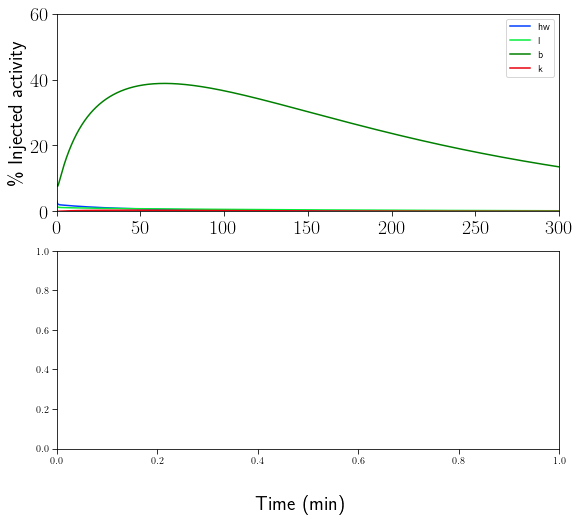

In [36]:
fig1, (ax1,ax2) = plt.subplots(nrows= 2, ncols = 1, figsize = (9,8))
ax1.plot(time_plot,s1)
ax1.plot(time_plot,s2)
ax1.plot(time_plot,s3, color = "green")
ax1.plot(time_plot,s4)
#ax1.plot(df['xb']*60,df['yb'], 'o')
#ax1.plot(df['xl']*60,df['yl'], 'o')
#ax1.plot(df['xhw']*60,df['yhw'], 'o')
#ax1.plot(df['xk']*60,df['yk'], 'o')
#ax1.plot(time_plot,s5)
ax1.set_xlim([0,t/60])
ax1.set_ylim([0,60])
ax1.legend(('hw', 'l', 'b', 'k', 'b s', 'l s', 'hw s', 'k s'))
ax1.grid(False)
ax1.set_ylabel("\% Injected activity", fontsize = 20)
#ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.tick_params(axis = "both", labelsize = 20)

fig1.supxlabel("Time (min)", fontsize = 20)

In [ ]:
#Comment apapun
#daklfjdalfjd